<a href="https://colab.research.google.com/github/shadowbanker/shadowbanker/blob/main/Gaios_OS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
!pip install ccxt
import ccxt as ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 KB 17.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.1.0 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = '/content/drive/MyDrive/TotalMarketCSV File.csv'
MarketDF = pd.read_csv(data)

MarketDF.describe

<bound method NDFrame.describe of       Unnamed: 0  24h_volume_usd  available_supply                 id  \
0              0    9.007640e+09      1.672352e+07            bitcoin   
1              1    1.551330e+09      9.616537e+07           ethereum   
2              2    1.111350e+09      1.684044e+07       bitcoin-cash   
3              3    2.936090e+09      2.779530e+09               iota   
4              4    2.315050e+08      3.873915e+10             ripple   
...          ...             ...               ...                ...   
1321        1321             NaN               NaN          turbocoin   
1322        1322             NaN               NaN              birds   
1323        1323             NaN               NaN  bitcoincashscrypt   
1324        1324             NaN               NaN          swisscoin   
1325        1325             NaN               NaN          faceblock   

      last_updated  market_cap_usd    max_supply               name  \
0       1512549554

In [5]:
MarketDF.shape
MarketDF.info

<bound method DataFrame.info of       Unnamed: 0  24h_volume_usd  available_supply                 id  \
0              0    9.007640e+09      1.672352e+07            bitcoin   
1              1    1.551330e+09      9.616537e+07           ethereum   
2              2    1.111350e+09      1.684044e+07       bitcoin-cash   
3              3    2.936090e+09      2.779530e+09               iota   
4              4    2.315050e+08      3.873915e+10             ripple   
...          ...             ...               ...                ...   
1321        1321             NaN               NaN          turbocoin   
1322        1322             NaN               NaN              birds   
1323        1323             NaN               NaN  bitcoincashscrypt   
1324        1324             NaN               NaN          swisscoin   
1325        1325             NaN               NaN          faceblock   

      last_updated  market_cap_usd    max_supply               name  \
0       1512549554  

In [6]:
MarketDF.isnull().sum()

Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64

In [7]:
d1 = MarketDF.dropna()
print(d1)

      Unnamed: 0  24h_volume_usd  available_supply                  id  \
0              0    9.007640e+09      1.672352e+07             bitcoin   
2              2    1.111350e+09      1.684044e+07        bitcoin-cash   
3              3    2.936090e+09      2.779530e+09                iota   
4              4    2.315050e+08      3.873915e+10              ripple   
5              5    2.289430e+08      7.736420e+06                dash   
...          ...             ...               ...                 ...   
1020        1020    6.909060e+01      1.662700e+04              enigma   
1021        1021    1.300720e+02      1.994860e+05             ulatech   
1024        1024    2.231020e+02      4.213000e+05  digital-money-bits   
1028        1028    4.271860e+01      8.714000e+04          caliphcoin   
1030        1030    1.718820e+02      7.924200e+04       applecoin-apw   

      last_updated  market_cap_usd    max_supply                name  \
0       1512549554    2.130490e+11  2.1

In [8]:
d1.isnull().sum()

Unnamed: 0            0
24h_volume_usd        0
available_supply      0
id                    0
last_updated          0
market_cap_usd        0
max_supply            0
name                  0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
price_btc             0
price_usd             0
rank                  0
symbol                0
total_supply          0
dtype: int64

In [9]:
df = pd.DataFrame(d1)
print(df)

      Unnamed: 0  24h_volume_usd  available_supply                  id  \
0              0    9.007640e+09      1.672352e+07             bitcoin   
2              2    1.111350e+09      1.684044e+07        bitcoin-cash   
3              3    2.936090e+09      2.779530e+09                iota   
4              4    2.315050e+08      3.873915e+10              ripple   
5              5    2.289430e+08      7.736420e+06                dash   
...          ...             ...               ...                 ...   
1020        1020    6.909060e+01      1.662700e+04              enigma   
1021        1021    1.300720e+02      1.994860e+05             ulatech   
1024        1024    2.231020e+02      4.213000e+05  digital-money-bits   
1028        1028    4.271860e+01      8.714000e+04          caliphcoin   
1030        1030    1.718820e+02      7.924200e+04       applecoin-apw   

      last_updated  market_cap_usd    max_supply                name  \
0       1512549554    2.130490e+11  2.1

In [10]:
df_clean = df[['24h_volume_usd', 'available_supply', 'last_updated', 'market_cap_usd', 
               'max_supply', 'name', 'percent_change_1h', 'percent_change_24h',
               'percent_change_7d', 'price_btc', 'price_usd', 'symbol', 'total_supply']]
df_clean.head()

,24h_volume_usd,available_supply,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,symbol,total_supply
0,9.007640e+09,1.672352e+07,1512549554,2.130490e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,BTC,1.672352e+07
2,1.111350e+09,1.684044e+07,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,XRP,9.999309e+10
5,2.289430e+08,7.736420e+06,1512549542,5.794076e+09,1.890000e+07,Dash,1.22,-3.31,10.64,0.059856,748.935000,DASH,7.736420e+06


In [11]:
import pandas as pd

# Read the dataframe
df = df_clean

# Group the data by column "market_cap_usd" and compute the mean of column "price_btc" for each group
df_grouped = df.groupby("price_btc")["market_cap_usd"].mean()

# Group the data by column "price_usd" and compute the mean and standard deviation of columns "percent_change_1h", "percent_change_24h", "percent_change_7d" for each group
df_aggregated = df.groupby("price_usd").agg({"percent_change_1h": ["mean", "std"], 
                                             "percent_change_24h": ["mean", "std"], 
                                             "percent_change_7d": ["mean", "std"]})

# Group the data by column "price_usd" and apply a custom function to the groups
def custom_function(x):
    return x.max() - x.min()

df_percents = df.groupby("price_usd").agg({"percent_change_1h": custom_function,
                                           "percent_change_24h": custom_function,
                                           "percent_change_7d": custom_function})

# Compute the rolling average of a data frame with a window size of 2
df_rolling = df.rolling(window=2).mean()
print(df_rolling)


      24h_volume_usd  available_supply  last_updated  market_cap_usd  \
0                NaN               NaN           NaN             NaN   
2       5.059495e+09      1.678198e+07  1.512550e+09    1.191724e+11   
3       2.023720e+09      1.398185e+09  1.512550e+09    2.002405e+10   
4       1.583798e+09      2.075934e+10  1.512550e+09    1.205879e+10   
5       2.302240e+08      1.937344e+10  1.512550e+09    7.579709e+09   
...              ...               ...           ...             ...   
1020    4.873285e+01      4.591662e+06  1.512550e+09    5.842500e+03   
1021    9.958130e+01      1.080565e+05  1.512550e+09    2.302500e+03   
1024    1.765870e+02      3.103930e+05  1.512550e+09    1.408500e+03   
1028    1.329103e+02      2.542200e+05  1.512550e+09    3.075000e+02   
1030    1.073003e+02      8.319100e+04  1.512550e+09    5.500000e+01   

        max_supply  percent_change_1h  percent_change_24h  percent_change_7d  \
0              NaN                NaN                 N

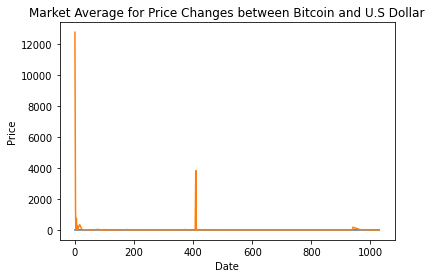

In [12]:
 import matplotlib.pyplot as plt

# Plot the data
#plt.plot(df_clean.index, df_clean[["price_btc", "price_usd"]])
df["price_btc"].plot()
df["price_usd"].plot()


# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Market Average for Price Changes between Bitcoin and U.S Dollar")

# Show the plot
plt.show()


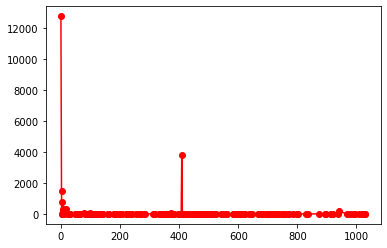

In [13]:
# Plot the data with red circles as markers
plt.plot(df_clean.index, df_clean["price_usd"], "r-o")

<BarContainer object of 186 artists>

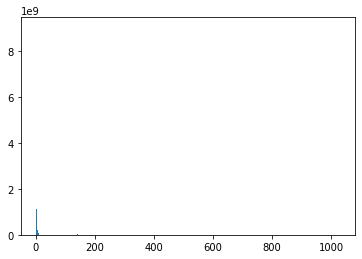

In [14]:
plt.bar(df_clean.index, df_clean["24h_volume_usd"])

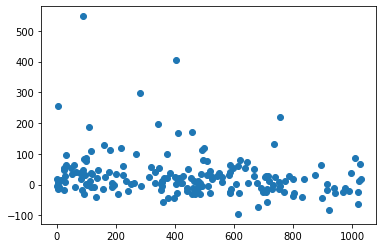

In [15]:
plt.scatter(df_clean.index, df_clean["percent_change_7d"])

In [16]:
class Portfolio:
    def __init__(self):
        self.df_clean = {}  # Dictionary to hold the stocks in the Portfolio

    def add_stock(self, symbol, shares):
        """Add a stock to the portfolio"""
        self.df_clean[symbol] = shares

    def remove_stock(self, symbol):
        """Remove a stock from the portfolio"""
        del self.df_clean[symbol]

    def get_stocks(self):
        """Get a list of the stocks in the portfolio"""
        return list(self.df_clean.keys())

    def get_shares(self, symbol):
        """Get the number of shares of a stock in the portfolio"""
        return self.stocks[symbol]

# Create a new portfolio
p = Portfolio()

# Add some stocks to the portfolio
p.add_stock("XMR", 100)
p.add_stock("ADA", 50)
p.add_stock("GRT", 200)


# Print the stocks in the portfolio
print(p.get_stocks())

# Output: ['XMR', 'ADA', 'GRT']


['XMR', 'ADA', 'GRT']


In [17]:
import pandas as pd

def liquidity(data):
    """Calculate the liquidity of stocks in the data frame"""
    # Calculate the liquidity as the product of the volume and the inverse of the spread
    data["Liquidity"] = df_clean["24h_volume_usd"] / (data["available_supply"] 
                                                      - data["price_usd"])
    return data

# Load the stock data into a data frame
df = pd.read_csv("/content/drive/MyDrive/TotalMarketCSV File.csv")

# Calculate the liquidity of the stocks
df = liquidity(df)

# Print the liquidity of the stocks
print(df["Liquidity"])


0       539.031514
1              NaN
2        65.998826
3         1.056326
4         0.005976
           ...    
1321           NaN
1322           NaN
1323           NaN
1324           NaN
1325           NaN
Name: Liquidity, Length: 1326, dtype: float64


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the crypto data into a data frame Percetile Changes
df = df_clean

# Split the data into features and labels
X = df[["percent_change_1h", "percent_change_7d", "price_usd"]]
y = df["24h_volume_usd"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train a random forest regressor on the data
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

# Make predictions on the crypto data
predictions = regr.predict(X_test)
print(predictions)

[2.61460311e+07 2.79072876e+06 5.53919670e+05 6.36475618e+06
 2.54118122e+05 9.92232355e+05 5.20888348e+07 3.00094703e+07
 4.40571615e+06 3.09780314e+06 2.87555958e+07 4.85514103e+07
 7.88831480e+06 2.71967305e+05 8.98370821e+06 1.69085615e+06
 2.38207588e+06 3.85472305e+07 3.11063014e+05 4.87382315e+07
 2.43328233e+05 6.15742069e+04 1.80471216e+05 1.27117530e+05
 6.21392404e+03 4.66383636e+07 1.16463812e+05 1.14920930e+05
 1.82909281e+06 4.64720478e+06 2.06422318e+03 1.25370867e+06
 2.60285467e+07 3.88295514e+06 9.11487154e+06 5.23271967e+06
 1.81745390e+06 7.08227434e+06 2.23568019e+07 3.58472421e+07
 1.06526350e+06 4.56453597e+06 9.86184116e+06 1.56195571e+07
 9.14755182e+06 1.78299686e+06 8.59368285e+05 7.33852966e+04
 8.53906485e+05 4.77537864e+06 2.35948142e+06 2.25538070e+05
 7.49961636e+05 1.10358386e+06 6.14823710e+05 1.05689487e+06
 4.60438526e+07 1.64074477e+06 1.00091938e+07 4.78667065e+06
 2.77981167e+03 5.51939976e+07]


In [19]:
import pandas as pd
import numpy as np

# Load the asset data into a data frame for Portoflio Management
df = pd.read_csv("/content/drive/MyDrive/TotalMarketCSV File.csv")

# Calculate the returns of the assets
df["Return"] = df["Price"].pct_change()

# Print the mean and standard deviation of the returns
print("Mean return:", df["Return"].mean())
print("Standard deviation:", df["Return"].std())

# Calculate the Sharpe ratio of the assets
sharpe_ratio = df["Return"].mean() / df["Return"].std()
print("Sharpe ratio:", sharpe_ratio)

# Calculate the correlations between the assets
correlations = df.corr()
print("Asset correlations:")
print(correlations)

# Optimize the portfolio using the Markowitz model
returns = df["Return"].values
covariance = df["Return"].cov()

# Set the target return and the constraints
target_return = 0.1
constraints = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

# Minimize the portfolio variance
portfolio_variance = lambda x: np.dot(x, np.dot(covariance, x))
result = minimize(portfolio_variance, num_assets*[1./num_assets,], 
                  method="SLSQP", bounds=bnds, constraints=constraints)
optimal_weights = result["x"]
print("Optimal weights:", optimal_weights)


KeyError: ignored

In [ ]:
import ccxt

# Connect to the exchange for Trades
exchange = ccxt.binance()

# Set the ticker symbol and the trade amount
symbol = "BTC/USDT"
amount = 0.1

# Check the current price of the asset
ticker = exchange.fetch_ticker(symbol)
print("Current price:", ticker["last"])

# Place a buy order
order = exchange.create_order(symbol, "limit", "buy", amount, ticker["last"])
print("Order placed:", order)

# Check the balance of the asset
balance = exchange.fetch_balance()
print("Asset balance:", balance[symbol])

# Place a sell order
order = exchange.create_order(symbol, "limit", "sell", amount, ticker["last"])
print("Order placed:", order)

# Check the balance of the asset again
balance = exchange.fetch_balance()
print("Asset balance:", balance[symbol])


In [ ]:
import ccxt

# Connect to the exchange for Swing Trade
exchange = ccxt.binance()

# Set the ticker symbol and the trade amount
symbol = "BTC/USDT"
amount = 0.1

# Set the stop loss and take profit levels
stop_loss = 0.95
take_profit = 1.05

# Fetch the current price of the asset
price = exchange.fetch_ticker(symbol)["last"]

# Place a buy order with a stop loss
order = exchange.create_order(symbol, "market", "buy", amount, {
    "stop_loss_price": price * stop_loss
})
print("Order placed:", order)

# Set a flag to track whether the trade is open
is_open = True

while is_open:
    # Fetch the current price of the asset
    price = exchange.fetch_ticker(symbol)["last"]

    # Check if the trade has hit the stop loss or take profit
    if price < stop_loss:
        # Sell the asset and close the trade
        exchange.create_order(symbol, "market", "sell", amount)
        is_open = False
    elif price > take_profit:
        # Sell the asset and close the trade
        exchange.create_order(symbol, "market", "sell", amount)
        is_open = False

print("Trade closed")


In [ ]:
import ccxt

# Connect to the exchange for Derivatives trade
exchange = ccxt.bitmex()

# Set the ticker symbol and the trade size
symbol = "BTC/USD"
size = 1

# Place a long futures contract order
order = exchange.create_order(symbol, "futures", "buy", size)
print("Order placed:", order)

# Check the position of the asset
position = exchange.private_get_position({"symbol": symbol})
print("Position:", position)

# Place a short futures contract order
order = exchange.create_order(symbol, "futures", "sell", size)
print("Order placed:", order)

# Check the position of the asset again
position = exchange.private_get_position({"symbol": symbol})
print("Position:", position)


In [ ]:
import ccxt

# Connect to the exchange for Options Trade
exchange = ccxt.deribit()

# Set the ticker symbol and the trade size
symbol = "BTC/USD"
size = 1

# Set the expiration date and strike price of the option
expiration_timestamp = 1609459200
strike_price = 100000

# Place a call option order
order = exchange.create_order(symbol, "option", "buy", size, {
    "type": "call",
    "expiration_timestamp": expiration_timestamp,
    "strike_price": strike_price
})
print("Order placed:", order)

# Place a put option order
order = exchange.create_order(symbol, "option", "buy", size, {
    "type": "put",
    "expiration_timestamp": expiration_timestamp,
    "strike_price": strike_price
})
print("Order placed:", order)


In [ ]:
import ccxt

# Connect to the exchange for Futures Trade
exchange = ccxt.bitmex()

# Set the ticker symbol and the trade size
symbol = "BTC/USD"
size = 1

# Place a long futures contract order
order = exchange.create_order(symbol, "futures", "buy", size)
print("Order placed:", order)

# Check the position of the asset
position = exchange.private_get_position({"symbol": symbol})
print("Position:", position)

# Place a short futures contract order
order = exchange.create_order(symbol, "futures", "sell", size)
print("Order placed:", order)

# Check the position of the asset again
position = exchange.private_get_position({"symbol": symbol})
print("Position:", position)


In [ ]:
import ccxt

# Connect to the exchanges for Arbitrage Trades
exchange1 = ccxt.binance()
exchange2 = ccxt.bitfinex()

# Set the ticker symbol
symbol = "BTC/USDT"

# Fetch the current prices of the asset on the two exchanges
price1 = exchange1.fetch_ticker(symbol)["last"]
price2 = exchange2.fetch_ticker(symbol)["last"]

# Calculate the price difference
difference = price1 - price2

# Set the trade amount
amount = 0.1

if difference > 0:
    # Buy on exchange 1 and sell on exchange 2
    order1 = exchange1.create_order(symbol, "market", "buy", amount)
    order2 = exchange2.create_order(symbol, "market", "sell", amount)
    print("Orders placed:", order1, order2)
elif difference < 0:
    # Sell on exchange 1 and buy on exchange 2
    order1 = exchange1.create_order(symbol, "market", "sell", amount)
    order2 = exchange2.create_order(symbol, "market", "buy", amount)
    print("Orders placed:", order1, order2)
else:
    print("No arbitrage opportunity")


In [ ]:
import ccxt

# Connect to the exchange for Perpetual Futures 
exchange = ccxt.bitmex()

# Set the ticker symbol and the trade size
symbol = "BTC/USD"
size = 1

# Place a long perpetual futures contract order
order = exchange.create_order(symbol, "perpetual", "buy", size)
print("Order placed:", order)

# Check the position of the asset
position = exchange.private_get_position({"symbol": symbol})
print("Position:", position)

# Place a short perpetual futures contract order
order = exchange.create_order(symbol, "perpetual", "sell", size)
print("Order placed:", order)

# Check the position of the asset again
position = exchange.private_get_position({"symbol": symbol})
print("Position:", position)


In [ ]:
import ccxt

# Connect to the exchange for Commodities Trades
exchange = ccxt.okcoin()

# Set the ticker symbol and the trade size
symbol = "XAU/USD"
size = 1

# Place a long trade
order = exchange.create_order(symbol, "spot", "buy", size)
print("Order placed:", order)

# Check the balance of the asset
balance = exchange.fetch_balance()
print("Asset balance:", balance[symbol])

# Place a short trade
order = exchange.create_order(symbol, "spot", "sell", size)
print("Order placed:", order)

# Check the balance of the asset again
balance = exchange.fetch_balance()
print("Asset balance:", balance[symbol])


In [ ]:
import requests

# Make a GET request to the specified URL for Application Programming Interfaces.
response = requests.get("https://www.example.com/")

# Print the status code and the content of the response
print("Status code:", response.status_code)
print("Content:", response.text)


In [ ]:
import bitcoin

# Generate a new private key and corresponding public key Bitcoin Wallets
private_key = bitcoin.random_key()
public_key = bitcoin.privtopub(private_key)

# Generate a new Bitcoin address
address = bitcoin.pubtoaddr(public_key)

print("Private key:", private_key)
print("Public key:", public_key)
print("Address:", address)


In [ ]:
import web3

# Connect to the Ethereum node for Web3 Wallets
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Check the current block number
block_number = web3.eth.blockNumber
print("Block number:", block_number)

# Generate a new private key and corresponding public key
private_key = web3.eth.account.create().privateKey.hex()
public_key = web3.eth.account.privateKeyToAccount(private_key).address

print("Private key:", private_key)
print("Public key:", public_key)


In [ ]:
import requests
import json

# Set the API endpoint and the access token VISA WALLET CODE
api_endpoint = "https://sandbox.api.visa.com/vctc/customerrules/v1/consumertransactioncontrols"
access_token = "your_access_token"

# Set the request headers
headers = {
    "Authorization": f"Bearer {access_token}",
    "Content-Type": "application/json"
}

# Set the request body
body = {
    "primaryAccountNumber": "4111111111111111",
    "transactionAmount": "100.00",
    "transactionCurrencyCode": "USD",
    "merchantCategoryCode": "6012"
}

# Make a POST request to the API endpoint
response = requests.post(api_endpoint, headers=headers, data=json.dumps(body))

# Print the status code and the response body
print("Status code:", response.status_code)
print("Response:", response.text)


In [ ]:
import requests
import json

# Set the API endpoint and the access token MASTERCARD WALLET CODE
api_endpoint = "https://sandbox.api.mastercard.com/wallet-services-web/walletapi/v1/issuer/issuers/{issuerId}/wallet/wallets"
access_token = "your_access_token"

# Set the request headers
headers = {
    "Authorization": f"Bearer {access_token}",
    "Content-Type": "application/json"
}

# Set the request body
body = {
    "name": "My Wallet",
    "description": "My digital wallet for Mastercard cards"
}

# Make a POST request to the API endpoint
response = requests.post(api_endpoint, headers=headers, data=json.dumps(body))

# Print the status code and the response body
print("Status code:", response.status_code)
print("Response:", response.text)


In [ ]:
import stripe

# Set the API key Payment Protections for Payment Processing
stripe.api_key = "sk_test_your_api_key"

# Set the payment details
amount = 1000
currency = "USD"
description = "My payment"

# Create a payment intent
intent = stripe.PaymentIntent.create(
    amount=amount,
    currency=currency,
    description=description,
    payment_method_types=["card"],
    confirm=True
)

# Print the payment intent
print("Payment intent:", intent)


In [ ]:
import gaios

# Set the payment details 
recipient = "3J98t1WpEZ73CNmQviecrnyiWrnqRhWNLy"
amount = 0.001

# Get the current transaction fee rate
fee_rate = gaios.getnetworkfee(2)
print("Transaction fee rate:", fee_rate)

# Create the transaction
tx = gaios.mktx(
    [],
    [(recipient, amount)],
    version=1
)

# Sign the transaction
tx = gaios.sign(tx, 0, "your_private_key")

# Send the transaction
txid = gaios.send(tx)
print("Transaction ID:", txid)


In [ ]:
import web3

# Connect to the Ethereum node for YIELD FARM CODE
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the address of the yield farm contract
contract_address = "0xyour_contract_address"

# Get the contract abi
contract_abi = [{...}]

# Load the contract
contract = web3.eth.contract(address=contract_address, abi=contract_abi)

# Set the parameters for the deposit function
deposit_amount = 1
deposit_token = "0xyour_token_address"

# Deposit the token into the yield farm
tx_hash = contract.functions.deposit(deposit_amount, deposit_token).transact()

# Wait for the transaction to be mined
tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)

# Check the status of the transaction
if tx_receipt["status"] == 1:
    print("Transaction successful")
else:
    print("Transaction failed")


In [ ]:
import stripe

# Set the API key MONEY TRANSFER CODE
stripe.api_key = "sk_test_your_api_key"

# Set the payment details
amount = 100
currency = "USD"
description = "My payment"
source = "tok_visa"

# Create a charge
charge = stripe.Charge.create(
    amount=amount,
    currency=currency,
    description=description,
    source=source
)

# Print the charge
print("Charge:", charge)


In [ ]:
import plaid

# Set the API key and environment Direct Deposit
client = plaid.Client(client_id="your_client_id", secret="your_secret", environment="sandbox")

# Set the access token
access_token = "your_access_token"

# Set the bank account details
bank_id = "your_bank_id"
account_id = "your_account_id"

# Create a deposit
deposit = client.Deposit.create(access_token, bank_id, account_id, {
  "amount": 500,
  "name": "Deposit"
})

# Print the deposit
print("Deposit:", deposit)


In [ ]:
#The Matrix Key rate system is for random allocation of capital distrubution of capital. 

In [ ]:
import math
import pandas as pd
import numpy as np


nc1 = np.matrix([[5,5,1], [5,8,7], [4,4,2]])
nc2 = np.matrix([[8,8,8], [7,3,4], [4,2,7]])
nc3 = np.matrix([[9,9,3], [6,9,6], [5,9,3]])
nc4 = np.matrix([[10,10,10], [2,7,10], [6,6,6]])

rate1low = nc1*0.00005
rate2low = nc2*0.00005
rate3low = nc3*0.00005

lowrate = [rate1low, rate2low, rate3low]
for x in lowrate:
  print(f'These are the lowest Matrix Hash Rates in Gaios: {x}')

gc1 = np.matrix([[9,24,20,], [16,12,12], [19,12,28], [8,25,29]])
gc2 = np.matrix([[24,24,12], [23,7,2], [3,9,2], [2,3,7]])
gc3 = np.matrix([[2,3,5], [4,10,2], [6,2,7], [4,9,6]])
gc4 = np.matrix([[9,5,8], [10,2,7], [8,2,7], [8,10,9]])

medium1 = gc1*0.0005
medium2 = gc2*0.0005
medium3 = gc3*0.0005

mediumrate = [medium1, medium2, medium3]
for x in mediumrate:
  print(f'These are the medium Matrix Hash Rates in Gaios: {x}')

bc1 = np.matrix([[8,9,2], [5,5,6], [7,8,5], [4,5,3]])
bc2 = np.matrix([[7,9,6], [4,6,2], [7,8,6], [2,6,9]])
bc3 = np.matrix ([[5,9,8], [7,6,4], [9,1,3], [7,2,7]])
bc4 = np.matrix([[5,9,8], [5,9,4], [9,5,10], [2,11,11],[5,5,5]])

highest1 = bc1*0.005
highest2 = bc2*0.005
highest3 = bc3*0.005

highestrates = [highest1, highest2, highest3]
for x in highestrates:
  print(f'These are the highest Matrix Hash Rates in Gaios: {x}')

MasterKey = np.matrix([[7,5,6], [4,3,7], [5,2,6], [9,2,10],
                  [7,4,8],[6,4,3]])
for x in MasterKey:
  print(MasterKey)


In [ ]:
import ccxt
import time

# Initialize the exchanges you want to use
exchange1 = ccxt.binance()
exchange2 = ccxt.kucoin()

while True:
    # Fetch the current prices of Bitcoin on both exchanges
    price1 = exchange1.fetch_ticker('BTC/USDT')['last']
    price2 = exchange2.fetch_ticker('BTC/USDT')['last']

    # Check if there is an opportunity for arbitrage
    if price1 > price2:
        # Calculate the difference in price and the amount of Bitcoin to buy
        diff = price1 - price2
        amount = 100 / price2

        # Place a buy order on exchange 2
        exchange2.create_market_buy_order('BTC/USDT', amount)

        # Place a sell order on exchange 1
        exchange1.create_market_sell_order('BTC/USDT', amount)

        # Log the trade
        print(f'Bought {amount} BTC on exchange 2 at {price2} and sold on exchange 1 at {price1} for a profit of {diff}')
    else:
        print(f'No opportunity found. Price on exchange 1 is {price1} and price on exchange 2 is {price2}')

    # Sleep for a minute before checking again
    time.sleep(60)


In [ ]:
import math
def micro_arbitrage(integral, Derivative, Price, Asset, Time):
  return (integral)[Derivative Contract*Market Price] + [Asset Valuation*log(Time)]

In [ ]:
import web3

# Connect to the Ethereum node for Zero Knowledge Proof Smart Contract
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the contract source code
contract_source_code = 
pragma solidity ^0.5.0;

contract ZeroKnowledgeProof {
    function prove(bytes calldata input) public pure returns (bool) {
        // Implement the zero knowledge proof logic here
        return true;
    }
}


# Compile the contract
compiled_contract = web3.eth.compile.solidity(contract_source_code)

# Get the contract interface
contract_interface = compiled_contract['<stdin>:ZeroKnowledgeProof']

# Deploy the contract
contract = web3.eth.contract(abi=contract_interface['abi'], bytecode=contract_interface['bin'])
tx_hash = contract.deploy

# Get the contract address
contract_address = tx_receipt['contractAddress']

# Load the contract
zero_knowledge_proof = web3.eth.contract(address=contract_address, abi=contract_interface['abi'])


In [ ]:
import stellar_sdk

# Set the horizon server for Federated Byzantine Agreement
server = stellar_sdk.Server("https://horizon-testnet.stellar.org")

# Set the account details
public_key = "your_public_key"
secret_key = "your_secret_key"

# Load the account
account = stellar_sdk.Account(public_key, secret=secret_key)

# Set the transaction details
amount = "100"
asset = stellar_sdk.Asset.native()
recipient = "your_recipient_address"

# Create the transaction
transaction = (
    stellar_sdk.TransactionBuilder(
        source_account=account,
        network_passphrase="Test SDF Network ; September 2015",
    )
    .append_payment_op(recipient, amount, asset)
    .build()
)

# Sign the transaction
transaction.sign(secret_key)

# Submit the transaction
response = server.submit_transaction(transaction)

#


In [ ]:
import fabric

# Set the network configuration for Proof of Reputable Observation
network_config = fabric.Network.get_test_network()

# Set the reputation threshold
reputation_threshold = 50

# Set the consensus plugin
consensus_plugin = fabric.Consensus.ProReO(reputation_threshold)

# Create the network
network = fabric.Network.create(
    network_config=network_config,
    consensus_plugin=consensus_plugin
)

# Start the network
network.start()

# Stop the network
network.stop()


In [ ]:
import web3

# Connect to the Ethereum node Proof of Stake Smart Contract
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the contract source code
contract_source_code =
pragma solidity ^0.5.0;

contract ProofOfStake {
    mapping (address => uint) public stakes;
    uint public totalStake;

    function stake(uint _value) public {
        require(_value > 0);
        stakes[msg.sender] += _value;
        totalStake += _value;
    }

    function unstake(uint _value) public {
        require(_value > 0 && _value <= stakes[msg.sender]);
        stakes[msg.sender] -= _value;
        totalStake -= _value;
    }

    function selectValidator() public view returns (address) {
        uint random = uint(keccak256(abi.encodePacked(now, msg.sender))) % totalStake;
        uint sum = 0;
        address selected;
        for (address validator in stakes) {
            sum += stakes[validator];
            if (sum > random) {
                selected = validator;
                break;
            }
        }
        return selected;
    }
}


# Compile the contract
compiled_contract = web3.eth.compile.solidity(contract_source_code)

# Get the contract interface


In [ ]:
import ccxt

# Set the exchange and the bank account details for Crypto Deposits
exchange_id = "binance"
exchange_class = getattr(ccxt, exchange_id)
exchange = exchange_class({
    "apiKey": "your_api_key",
    "secret": "your_secret_key",
    "options": {"defaultType": "spot"}
})
bank_account_id = "your_bank_account_id"

# Load the balance
balance = exchange.fetch_balance()

# Select the cryptocurrency to deposit
currency = "BTC"
amount = balance[currency]["total"]

# Deposit the cryptocurrency
response = exchange.withdraw(currency, amount, bank_account_id)
print(response)


In [ ]:
import web3

# Connect to the Ethereum node for Personal DAO
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the contract source code
contract_source_code = 
pragma solidity ^0.5.0;

contract DecentralizedAutonomousOrganization {
    address public owner;
    mapping (address => bool) public members;
    uint public memberCount;
    uint public minimumQuorum;

    constructor() public {
        owner = msg.sender;
        members[msg.sender] = true;
        memberCount = 1;
        minimumQuorum = 1;
    }

    function addMember(address _member) public {
        require(msg.sender == owner);
        require(!members[_member]);
        members[_member] = true;
        memberCount++;
    }

    function removeMember(address _member) public {
        require(msg.sender == owner);
        require(members[_member]);
        members[_member] = false;
        memberCount--;
    }

    function changeMinimumQuorum(uint _minimumQuorum) public {
        require(msg.sender == owner);
        minimumQuorum = _minimumQuorum;
    }

    function vote(bool _vote) public {
        require(members[msg.sender]);
        emit VoteCast(_vote);
    }

    function execute(bytes memory _data) public {
        uint votesFor = 0;
        uint votesAgainst = 0;
        for (address member in members) {
            if (members[member]) {
                if (member.call.value(0)(_data)) {
                    votesFor++;
                } else {
                    votesAgainst++;
                }
            }
        }
        if (votesFor >= minimumQuorum) {
            emit ExecutionSucceeded();
        } else {
            emit ExecutionFailed();
        }
    }

    event VoteCast(bool _vote);
    event ExecutionSucceeded();
    event ExecutionFailed();
}


# Compile the contract
compiled_contract = web3.eth.compile.solidity(contract_source_code)

# Get the contract interface
contract_interface = compiled_contract["<stdin>:DecentralizedAutonomousOrganization"]

# Deploy the contract
contract = web3.eth.contract(abi=contract_interface["abi"], bytecode=contract_interface["bin"])
tx_hash = contract.deploy(transaction={"from": web3.eth.coinbase})

# Get the contract address
contract_


In [ ]:
import web3

# Connect to the Ethereum node Personal Treasury
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the contract source code
contract_source_code = 
pragma solidity ^0.5.0;

contract DecentralizedTreasury {
    address public owner;
    address public recipient;
    uint public totalFunds;
    uint public fundsAvailable;
    mapping (bytes32 => bool) public requests;
    uint public requestCount;
    uint public minimumQuorum;

    constructor(address _recipient, uint _totalFunds, uint _minimumQuorum) public {
        owner = msg.sender;
        recipient = _recipient;
        totalFunds = _totalFunds;
        fundsAvailable = _totalFunds;
        minimumQuorum = _minimumQuorum;
    }

    function requestFunds(bytes32 _requestId, uint _amount) public {
        require(_amount > 0 && _amount <= fundsAvailable);
        require(!requests[_requestId]);
        requests[_requestId] = true;
        requestCount++;
    }

    function vote(bytes32 _


In [ ]:
import web3

# Connect to the Ethereum node for Personal Custody
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the contract source code
contract_source_code = 
pragma solidity ^0.5.0;

contract DecentralizedCustody {
    address public owner;
    mapping (address => bool) public authorized;
    mapping (address => uint) public balances;
    uint public totalSupply;

    constructor(uint _totalSupply) public {
        owner = msg.sender;
        authorized[msg.sender] = true;
        totalSupply = _totalSupply;
        balances[msg.sender] = _totalSupply;
    }

    function authorize(address _spender) public {
        require(msg.sender == owner);
        authorized[_spender] = true;
    }

    function revoke(address _spender) public {
        require(msg.sender == owner);
        authorized[_spender] = false;
    }

    function transfer(address _to, uint _value) public {
        require(balances[msg.sender] >= _value && authorized[msg.sender]);
        require(_to != address(0));
        balances[msg.sender] -= _value;
        balances[_to] += _value;
        emit Transfer(msg.sender, _to, _value);
    }

    function approve(address _spender, uint _value) public {
        require(balances[msg.sender] >= _value && authorized[msg.sender]);
        require(_spender != address(0));
        emit Approval(msg.sender, _spender, _value);
    }

    function transferFrom(address _from, address _to, uint _value) public {
        require(balances[_from] >= _value && authorized[_from] && authorized[_to]);
        require(_to != address(0));
        balances[_from] -= _value;
        balances[_to] += _value;
        emit Transfer(_from, _to, _value);
    }

    event Transfer(address indexed _from, address indexed _to, uint _value);
    event Approval(address indexed _owner, address indexed _spender, uint _value);
}


# Compile the contract
compiled_contract = web3.eth.compile.solidity(contract_source_code)


In [ ]:
import web3

# Connect to the Ethereum node DeFi Loans
web3 = web3.Web3(web3.Web3.HTTPProvider("http://localhost:8545"))

# Set the contract source code
contract_source_code = 
pragma solidity ^0.5.0;

contract DecentralizedLoanProvider {
    address public owner;
    mapping (bytes32 => Loan) public loans;
    uint public loanCount;
    uint public interestRate;
    uint public minimumLoanAmount;
    uint public maximumLoanAmount;

    constructor(uint _interestRate, uint _minimumLoanAmount, uint _maximumLoanAmount) public {
        owner = msg.sender;
        interestRate = _interestRate;
        minimumLoanAmount = _minimumLoanAmount;
        maximumLoanAmount = _maximumLoanAmount;
    }

    function requestLoan(bytes32 _loanId, uint _amount, uint _term) public {
        require(_amount >= minimumLoanAmount && _amount <= maximumLoanAmount);
        require(loans[_loanId] == Loan(0, 0, 0, 0));
        loans[_loanId] = Loan(_amount, _term, interestRate, msg.sender);
        loanCount++;
        emit LoanRequested(_loanId, _


In [ ]:
from web3 import Web3

# Connect to Ethereum blockchain TO CREATE TOKEN GAIOS WRAPPED TOKENS 
w3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/YOUR-PROJECT-ID"))

# ERC-20 contract ABI
contract_abi = [{...}]

# ERC-20 contract address
contract_address = "0x..."

# Create contract object
contract = w3.eth.contract(address=contract_address, abi=contract_abi)

# Your Ethereum address
my_address = "0x..."

# Your private key
my_private_key = "0x..."

# Function to mint new tokens
def mint_token(to_address, amount):
    # Build transaction
    nonce = w3.eth.getTransactionCount(my_address)
    gas_price = w3.eth.gasPrice
    gas_limit = 100000
    data = contract.functions.mint(to_address, amount).buildTransaction({
        'gas': gas_limit,
        'gasPrice': gas_price,
        'nonce': nonce,
    })

    # Sign transaction
    signed_tx = w3.eth.account.signTransaction(data, my_private_key)

    # Send transaction
    tx_hash = w3.eth.sendRawTransaction(signed_tx.rawTransaction)

    # Wait for transaction to be mined
    tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

    # Check if transaction was successful
    if tx_receipt['status'] == 1:
        print("Token minted successfully")
    else:
        print("Error: Token mint failed")

# Example usage
to_address = "0x..."
amount = 100
mint_token(to_address, amount)


In [ ]:
from web3 import Web3
from openzeppelin_sdk import NFT

# Connect to Ethereum blockchain TO CREATE GAIOS BACKED NFTS
w3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/YOUR-PROJECT-ID"))

# Your Ethereum address
my_address = "0x..."

# Your private key
my_private_key = "0x..."

# Create NFT object
nft = NFT(w3, my_address, my_private_key)

# Create new NFT
metadata = "My first NFT"
image_url = "https://example.com/image.png"
tx_hash = nft.create(metadata, image_url)

# Wait for transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

# Check if transaction was successful
if tx_receipt['status'] == 1:
    print("NFT created successfully. NFT ID:", tx_receipt['logs'][0]['topics'][1])
else:
    print("Error: NFT creation failed")


In [ ]:
import requests
import json

# Flight booking API endpoint for Flights
api_endpoint = "https://flight-booking-api.com/book"

# Flight information
flight_info = {
    "origin": "New York",
    "destination": "Los Angeles",
    "date": "2022-06-01",
    "passenger_name": "John Smith",
    "passenger_email": "john.smith@example.com"
}

# Make API request to book flight
response = requests.post(api_endpoint, json=flight_info)

# Check if booking was successful
if response.status_code == 200:
    flight_booking_details = json.loads(response.text)
    print("Flight booked successfully! Booking details:")
    print("Booking reference:", flight_booking_details['booking_reference'])
    print("Total cost:", flight_booking_details['total_cost'])
else:
    print("Error: Flight booking failed")


In [ ]:
import requests
import json

# Car booking API endpoint for booking CARS
api_endpoint = "https://car-booking-api.com/book"

# Car rental information
car_info = {
    "pickup_location": "New York",
    "dropoff_location": "Los Angeles",
    "pickup_date": "2022-06-01",
    "dropoff_date": "2022-06-05",
    "car_type": "SUV",
    "renter_name": "John Smith",
    "renter_email": "john.smith@example.com"
}

# Make API request to book car
response = requests.post(api_endpoint, json=car_info)

# Check if booking was successful
if response.status_code == 200:
    car_booking_details = json.loads(response.text)
    print("Car booked successfully! Booking details:")
    print("Booking reference:", car_booking_details['booking_reference'])
    print("Total cost:", car_booking_details['total_cost'])
    print("Pickup location:", car_booking_details['pickup_location'])
    print("Dropoff location:", car_booking_details['dropoff_location'])
else:
    print("Error: Car booking failed")


In [ ]:
import requests
import json

# Boat booking API endpoint for BOATS
api_endpoint = "https://boat-booking-api.com/book"

# Boat rental information
boat_info = {
    "pickup_location": "Miami",
    "dropoff_location": "Bahamas",
    "pickup_date": "2022-06-01",
    "dropoff_date": "2022-06-05",
    "boat_type": "Yachts",
    "renter_name": "John Smith",
    "renter_email": "john.smith@example.com"
}

# Make API request to book boat
response = requests.post(api_endpoint, json=boat_info)

# Check if booking was successful
if response.status_code == 200:
    boat_booking_details = json.loads(response.text)
    print("Boat booked successfully! Booking details:")
    print("Booking reference:", boat_booking_details['booking_reference'])
    print("Total cost:", boat_booking_details['total_cost'])
    print("Pickup location:", boat_booking_details['pickup_location'])
    print("Dropoff location:", boat_booking_details['dropoff_location'])
else:
    print("Error: Boat booking failed")


In [ ]:
import requests
import json

# Private jet booking API endpoint FOR CHARTER JETS
api_endpoint = "https://private-jet-booking-api.com/book"

# Private jet charter information
jet_info = {
    "origin": "New York",
    "destination": "Los Angeles",
    "departure_date": "2022-06-01",
    "return_date": "2022-06-05",
    "jet_type": "Bombardier Challenger 850",
    "passenger_name": "John Smith",
    "passenger_email": "john.smith@example.com"
}

# Make API request to book private jet
response = requests.post(api_endpoint, json=jet_info)

# Check if booking was successful
if response.status_code == 200:
    jet_booking_details = json.loads(response.text)
    print("Private jet booked successfully! Booking details:")
    print("Booking reference:", jet_booking_details['booking_reference'])
    print("Total cost:", jet_booking_details['total_cost'])
    print("Origin:", jet_booking_details['origin'])
    print("Destination:", jet_booking_details['destination'])
else:
    print("Error: Private jet booking failed")


In [ ]:
import pandas as pd
from datetime import datetime
import ccxt as ccxt
pair = 'ETH/USDT'

ohlcv = binance.fetch_ohlcv(pair, '1d')
prices = [x[4] for x in ohlcv]

dates = [datetime.fromtimestamp (x[0 // 1000]) for x in ohlcv]
data = pd.series (prices, index=dates)
data.plot()